In [1]:
import scanpy as sc
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer
import umap

from grnndata import GRNAnnData, read_h5ad
from grnndata import utils 


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
from scprint.tasks.grn import get_GTdb


import seaborn as sns
import hdbscan

%load_ext autoreload
%autoreload 2

import torch
torch.set_float32_matmul_precision('medium')

💡 loaded instance: jkobject/scprint


In [ ]:
#model = scPrint.load_from_checkpoint('../../data/tensorboard/scprint_test/urxxwu28/checkpoints/epoch=0-step=20000.ckpt') #chocolate-surf-8
model = scPrint.load_from_checkpoint('../../data/temp/cmgiqxw/epoch=3-step=20000.ckpt', precpt_gene_emb = '../../data/temp/embeddings.parquet')
# ../../data/temp/epoch=4-step=12500.ckpt latest model maestro (fortuitous laugther)
# ../../data/logs/scprint_test/f4vao230/checkpoints/epoch=10-step=27500.ckpt looked good as a training run (vermlillion noodle)
# d1792z9k/epoch=3-step=10000.ckpt
# '../../data/temp/d1792z9k/epoch=3-step=10000.ckpt'
# '../../data/temp/6q3dzi3x/epoch=3-step=10000.ckpt'
# '../../data/temp/grsachbg/epoch=2-step=15000.ckpt'
## post debug
# "../lightning_logs/version_14/checkpoints/epoch=1-step=5000.ckpt"

NameError: name 'scPrint' is not defined

In [ ]:
print(model)

scPrint(
  (gene_encoder): GeneEncoder(
    (embedding): Embedding(33890, 128)
  )
  (expr_encoder): ContinuousValueEncoder(
    (encoder): ModuleList(
      (0): Linear(in_features=1, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (pos_encoder): PositionalEncoding()
  (label_encoder): CategoryValueEncoder(
    (embedding): Embedding(8, 128)
  )
  (depth_encoder): ContinuousValueEncoder(
    (encoder): ModuleList(
      (0): Linear(in_features=1, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (norm_and_dropout): Sequential(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (1): Dropout(p=0.1, inplace=False)
  )


In [ ]:
#only dataset dropped
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/z7ZZxORUQFshySbuvNW7.h5ad') 

# one that it trained on: z7ZZxORUQFshySbuvNW7.
# untrained on: BljRloq1xjcxRNDpejzI
# and yBCKp6HmXuHa0cZptMo7

In [ ]:
adata = sc.read(
    "data/pancreas_atlas.h5ad",
    backup_url="https://figshare.com/ndownloader/files/24539828",
)


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
adata = sc.read(
    "data/lung_atlas.h5ad",
    backup_url="https://figshare.com/ndownloader/files/24539942",
)

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
preprocessor = Preprocessor(subset_hvg=1000, use_layer='counts', is_symbol=True, force_preprocess=True, skip_validate=True, do_postp=False)

In [ ]:
adata.obs['organism_ontology_term_id'] = "NCBITaxon:9606"
adata = preprocessor(adata.copy())

In [ ]:
adata

AnnData object with n_obs × n_vars = 12590 × 70116
    obs: 'hash_label', 'hash_cluster', 'n_genes', 'hashed', 'group', 'treatment', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pct_counts_hb', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden', 'lineage', 'type', 'cds', 'donor_region', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'BMI', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'outlier', 'mt_outlier', 'leiden

In [ ]:
sc.pl.umap(adata, color=["cell_type", "development_stage", "assay", "disease", "sex", "self_reported_ethnicity"], wspace=0.7)


In [1]:
adata.obs.cell_type.value_counts()

NameError: name 'adata' is not defined

In [ ]:
grn_inferer = GRNfer(model, adata, how="random expr")

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
grn_inferer.model.get_attention_layer = [3]
grn_inferer.predict(cell_type="oligodendrocyte precursor cell")

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [ ]:
grn_inferer.preprocess = "softmax"
grn_inferer.doplot = True

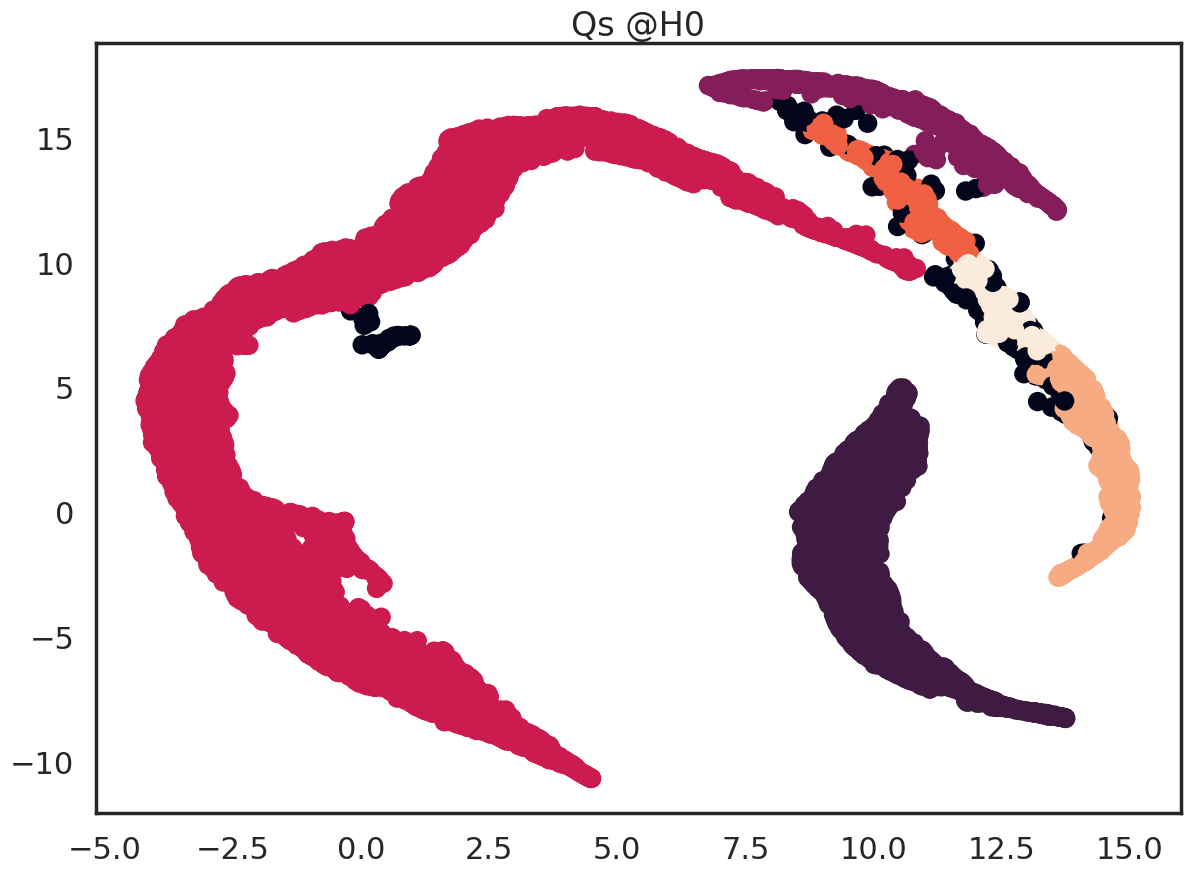

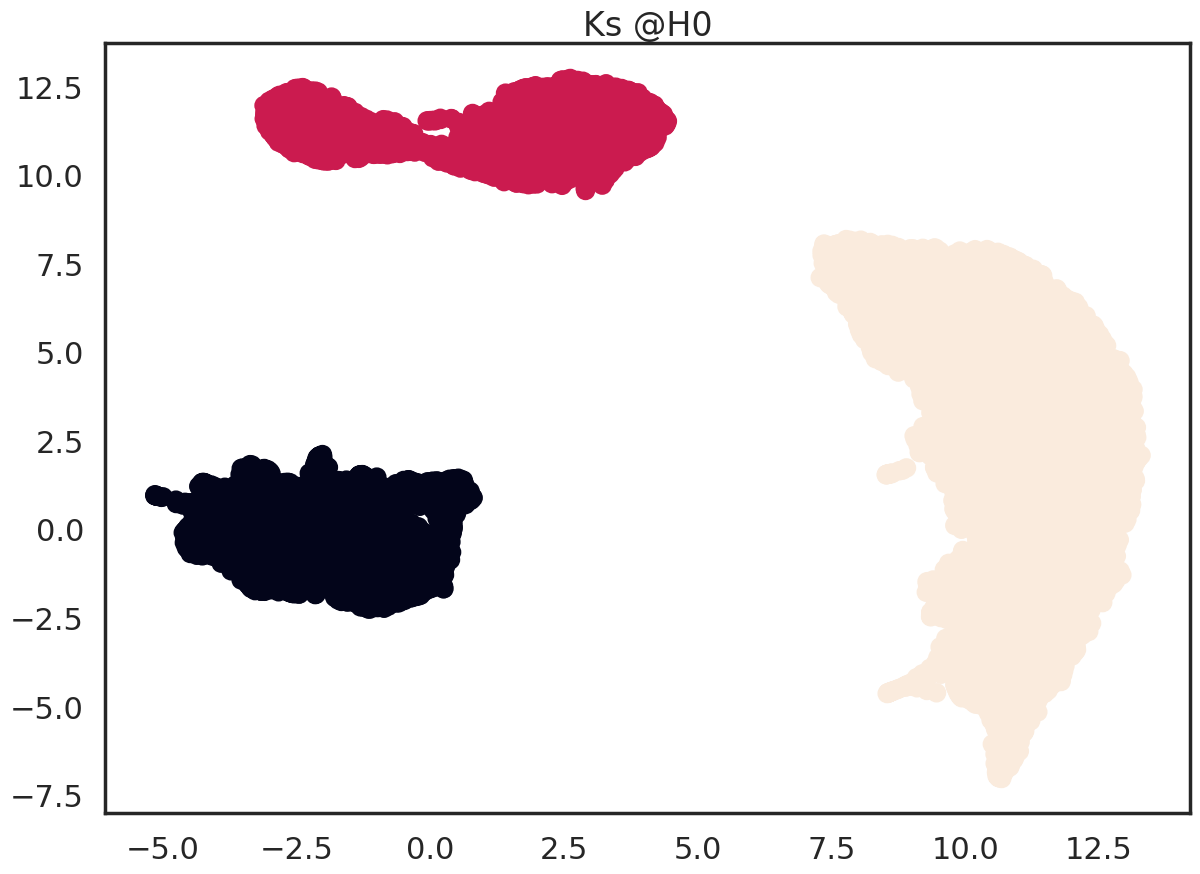

: 

In [ ]:
adj = grn_inferer.aggregate(grn_inferer.model.mean_attn[0])

In [5]:
attn = grn_inferer(cell_type="oligodendrocyte precursor cell", layers=[3])

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [7]:
grn_inferer.model.mean_attn[0].shape

torch.Size([64, 2008, 2, 4, 32])

## Test a bunch of random and see what make them similar

In [1]:
adj

NameError: name 'adj' is not defined

In [10]:
args = np.argsort(adj)
adj[args[np.arange(adj.shape[-1])[:, None], : -50]] = 0

In [ ]:
umap.UMAP(n_neighbors=20,
            min_dist=0.1,
            precomputed_knn=adj,
            ).fit_transform(adata[adata.obs.cell_type="oligodendrocyte precursor cell"].X.T)

In [11]:
gt = get_GTdb(db="stringdb")

In [14]:
gt.shape

(19193, 19193)

In [24]:
len(set(gt.index) & set(grn_inferer.curr_genes))

13980

In [28]:
gt['ENSG00000001460']

ENSG00000001460    0.0
ENSG00000099399    0.0
ENSG00000100249    0.0
ENSG00000105889    0.0
ENSG00000112308    0.0
                  ... 
ENSG00000101049    0.0
ENSG00000113595    0.0
ENSG00000009307    0.0
ENSG00000132466    0.0
ENSG00000158402    0.0
Name: ENSG00000001460, Length: 19193, dtype: float64

In [31]:
gt

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288709,ENSG00000288722,ENSG00000288784,ENSG00000288825,ENSG00000288859,ENSG00000288867,ENSG00000289549,ENSG00000289604,ENSG00000290292,ENSG00000291237
ENSG00000001460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000099399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000100249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000105889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000112308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000101049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ENSG00000113595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ENSG00000009307,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ENSG00000132466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
gt = gt.reindex(sorted(gt.columns), axis=1)
gt = gt.reindex(sorted(gt.columns), axis=0)


In [27]:
gt = gt.sort_index()

,ENSG00000075292,ENSG00000172531,ENSG00000180745,ENSG00000156886,ENSG00000185069,ENSG00000125817,ENSG00000177459,ENSG00000074201,ENSG00000109390,ENSG00000165066,...,ENSG00000152592,ENSG00000164778,ENSG00000130957,ENSG00000165084,ENSG00000114487,ENSG00000178093,ENSG00000203950,ENSG00000126953,ENSG00000185985,ENSG00000180210
ENSG00000001460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000099399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000100249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000105889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000112308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000101049,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ENSG00000113595,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ENSG00000009307,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000132466,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
grn_inferer.curr_genes

array(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', ...,
       'ENSG00000292339', 'ENSG00000292344', 'ENSG00000292346'],
      dtype='<U15')

In [21]:
adj.argmax()

116746

In [13]:
adj.shape

(19457, 19457)

In [10]:
from scdataloader.utils import load_genes

In [22]:
genedf = load_genes()

In [23]:
rn = {j['symbol']:i for i,j in genedf[['symbol']].iterrows() if j['symbol'] is not None}

In [24]:
rn

{'TSPAN6': 'ENSG00000000003',
 'TNMD': 'ENSG00000000005',
 'DPM1': 'ENSG00000000419',
 'SCYL3': 'ENSG00000000457',
 'C1orf112': 'ENSG00000000460',
 'FGR': 'ENSG00000000938',
 'CFH': 'ENSG00000000971',
 'FUCA2': 'ENSG00000001036',
 'GCLC': 'ENSG00000001084',
 'NFYA': 'ENSG00000001167',
 'STPG1': 'ENSG00000001460',
 'NIPAL3': 'ENSG00000001461',
 'LAS1L': 'ENSG00000001497',
 'ENPP4': 'ENSG00000001561',
 'SEMA3F': 'ENSG00000001617',
 'CFTR': 'ENSG00000001626',
 'ANKIB1': 'ENSG00000001629',
 'CYP51A1': 'ENSG00000001630',
 'KRIT1': 'ENSG00000001631',
 'RAD52': 'ENSG00000002016',
 'MYH16': 'ENSG00000002079',
 'BAD': 'ENSG00000002330',
 'LAP3': 'ENSG00000002549',
 'CD99': 'ENSG00000292348',
 'HS3ST1': 'ENSG00000002587',
 'AOC1': 'ENSG00000002726',
 'WNT16': 'ENSG00000002745',
 'HECW1': 'ENSG00000002746',
 'MAD1L1': 'ENSG00000002822',
 'LASP1': 'ENSG00000002834',
 'SNX11': 'ENSG00000002919',
 'TMEM176A': 'ENSG00000002933',
 'M6PR': 'ENSG00000003056',
 'KLHL13': 'ENSG00000003096',
 'CYP26B1': 'E

In [29]:
(set(gt.source))

8896

In [27]:
gt.iloc[:100].source.replace(rn)

0     ENSG00000198668
1     ENSG00000160014
2     ENSG00000143933
3     ENSG00000105974
4     ENSG00000149295
           ...       
95    ENSG00000133116
96    ENSG00000103769
97    ENSG00000197747
98    ENSG00000198959
99    ENSG00000055732
Name: source, Length: 100, dtype: object

In [25]:
gt = gt.replace({'source': rn, 'target': rn})
# gt = gt[gt.source.isin(rn.values()) & gt.target.isin(rn.values())]

KeyboardInterrupt: 

In [13]:
gt

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
0,CALM1,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
1,CALM3,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
2,CALM2,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
3,CAV1,TRPC1,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,5,5,8,10980191;12732636;14551243;16822931;18430726;1...
4,DRD2,TRPC1,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,1,1,1,18261457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278574,TAF7,MIMAT0000075,True,False,False,False,False,False,0,NaN,ENCODE_tf-mirna,mirna_transcriptional,1,0,None,None
278575,RAD21,MIMAT0005867,True,False,False,False,False,False,0,NaN,ENCODE_tf-mirna,mirna_transcriptional,1,0,None,None
278576,P23511,MIMAT0003308,True,False,False,False,False,False,0,NaN,ENCODE_tf-mirna,mirna_transcriptional,1,0,None,None
278577,FOSL2,MIMAT0005867,True,False,False,False,False,False,0,NaN,ENCODE_tf-mirna,mirna_transcriptional,1,0,None,None


In [6]:
used = []
for i, attn in enumerate(grn_inferer.model.mean_attn[0]):
    attn = attn[:, 0, :, :].permute(1, 0, 2) @ attn[:, 1, :, :].permute(1, 2, 0)
    attn = torch.softmax(attn,-1).max(0)[0].sum(0).detach().cpu().numpy()
    genes = np.argsort(-attn)[:10] - 8
    print(genes)
    genes = genes[genes>0]
    names = np.array(grn_inferer.model.genes)[grn_inferer.model.pos[i].detach().cpu().numpy()]
    print(names[genes])
    used.append(set(names[genes]))
    print(attn[np.argsort(-attn)[:10]]) # 10 genes explain 72/80 of the attention
#    break
print(Counter([a for i in used for a in i]))

[  -4  670  242  789 1500 1072  626   -2  985 1073]
['ENSG00000186468' 'ENSG00000133030' 'ENSG00000105640' 'ENSG00000169783'
 'ENSG00000157637' 'ENSG00000165072' 'ENSG00000142676' 'ENSG00000165219']
[2004.   1888.   1186.   1010.    624.    354.8   213.8    89.94   38.34
   37.97]
[  -4  799  379   -2  927  753 1617 1917 1130 1944]


['ENSG00000167526' 'ENSG00000181481' 'ENSG00000198034' 'ENSG00000198947'
 'ENSG00000140443' 'ENSG00000134871' 'ENSG00000075624' 'ENSG00000288375']
[1981.   1791.   1785.   1015.    366.    269.5   201.    145.9   105.44
   89.  ]
[  -4  220    4 1983 1257 1516 1139 1649 1052  394]

[1981.   1791.   1785.   1015.    366.    269.5   201.    145.9   105.44
   89.  ]
[  -4  220    4 1983 1257 1516 1139 1649 1052  394]
['ENSG00000142937' 'ENSG00000006740' 'ENSG00000164587' 'ENSG00000160219'
 'ENSG00000277334' 'ENSG00000075624' 'ENSG00000276353' 'ENSG00000144713'
 'ENSG00000184986']
[1992.  1393.  1361.  1321.   589.5  268.8  268.   193.6  136.6   97.5]
[  -4   14 1671 1945  213 1475 1971 1838 1895 1314]
['ENSG00000167526' 'ENSG00000136444' 'ENSG00000111245' 'ENSG00000123066'
 'ENSG00000172292' 'ENSG00000237445' 'ENSG00000251771' 'ENSG00000276971'
 'ENSG00000205542']
[1942.   1759.   1755.   1115.    392.8   204.4   155.6   137.9   136.1
   80.25]
[  -4 1097   -2 1771  290  169  791 1899 144

## create the aggregation on random

In [59]:
mean_attn = torch.zeros([len(model.genes)+len(model.labels)+2]+ list(grn_inferer.model.mean_attn[0].shape[2:]))
div = torch.zeros([len(model.genes)+len(model.labels)+2]+ list(grn_inferer.model.mean_attn[0].shape[2:]))

for i in range(grn_inferer.model.mean_attn[0].shape[0]):
    loc = torch.cat([torch.Tensor([r for r in range(8)]), grn_inferer.model.pos[i]]).int()
    mean_attn[loc, :,:,:] += grn_inferer.model.mean_attn[0][i].detach().to("cpu")
    div[loc,:,:,:] +=1
mean_attn = mean_attn / div
goodloc = div.sum((1,2,3))>0
mean_attn = mean_attn[goodloc]

In [20]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})


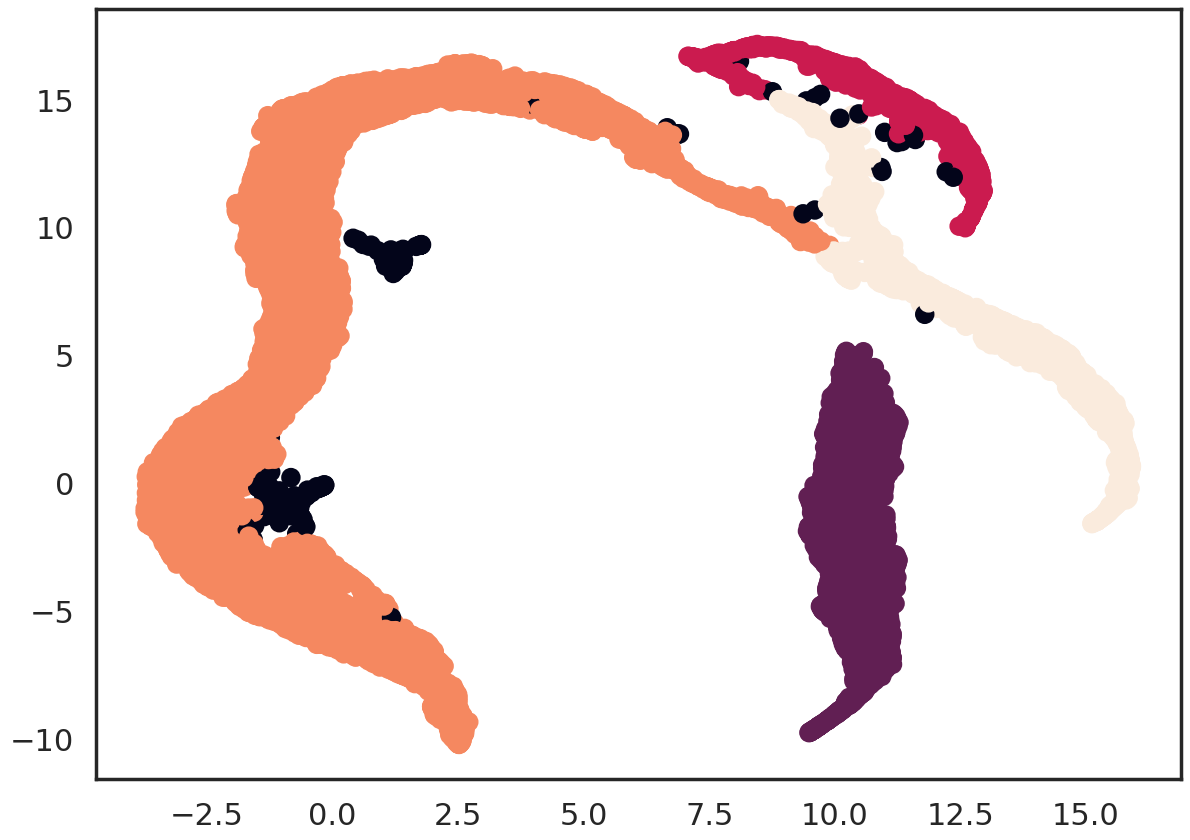

In [83]:
fit = umap.UMAP()
mm = fit.fit_transform(mean_attn[0:][:, 0, 0, :])
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(mm)
plt.scatter(mm[:,0], mm[:,1], c=labels)

In [76]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(mm)

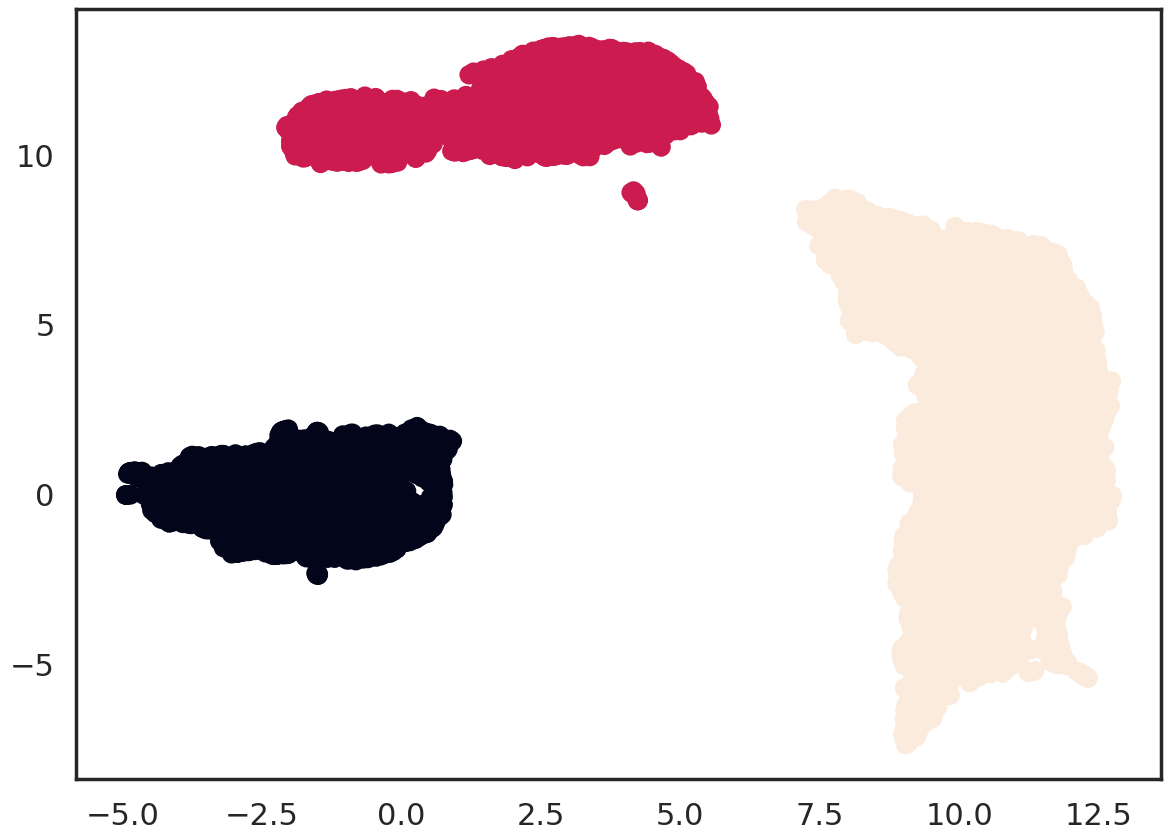

In [77]:
plt.scatter(mm[:,0], mm[:,1], c=labels)

In [81]:
names[labels[8:]==1]
# what makes them cluster??

array(['ENSG00000000971', 'ENSG00000001617', 'ENSG00000002919', ...,
       'ENSG00000292346', 'ENSG00000292348', 'ENSG00000292354'],
      dtype='<U15')

In [66]:
attn = mean_attn[0:][:, 0, :, :].permute(
    1, 0, 2
) @ mean_attn[0:][:, 1, :, :].permute(1, 2, 0)

In [67]:
attn.shape

torch.Size([4, 19460, 19460])

In [68]:
res = torch.softmax(attn,-1).max(0)[0].sum(0)
res.sum(), res.shape, np.argsort(-res)[:10] - 8, res[np.argsort(-res)[:10]] # 10 genes explain 72/80 of the attention

(tensor(77836.7656),
 torch.Size([19460]),
 tensor([ 6578,    -4,  7724, 11617,  6834,  2978, 17034, 17018, 15408, 14741]),
 tensor([11292.3105, 11248.6855,  9443.1543,  6045.7104,  5992.7031,  5870.1182,
          4494.3237,  3719.2683,  2825.2148,  1573.9918]))

In [72]:
genes

tensor([ 6578,  7724, 11617,  6834,  2978, 17034, 17018, 15408, 14741])

In [71]:
genes = np.argsort(-res)[:10] - 8
genes = genes[genes>0]
names = np.array(grn_inferer.model.genes)[goodloc[8:]]
names[genes]


array(['ENSG00000142871', 'ENSG00000154188', 'ENSG00000183722',
       'ENSG00000144659', 'ENSG00000109424', 'ENSG00000265215',
       'ENSG00000265048', 'ENSG00000236457', 'ENSG00000223608'],
      dtype='<U15')

In [1]:
a

NameError: name 'a' is not defined

<Axes: >

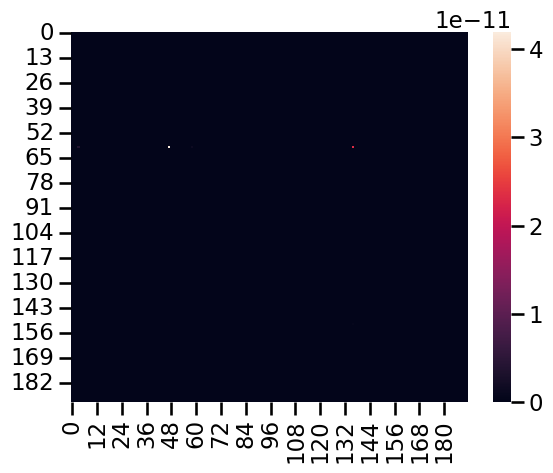

In [16]:
attn_numpy = torch.softmax(attn,-1)[0,8:200,8:200].detach().cpu().numpy()
#attn_numpy = attn[0,:200,:200]

# Create a heatmap
sns.heatmap(attn_numpy)

## debug the masker and downsampler

In [9]:
from scprint.model.utils import downsample_profile, masker
from scdataloader.data import SimpleAnnDataset
from scdataloader import Collator
from grnndata import utils
from torch.utils.data import DataLoader
adataset = SimpleAnnDataset(
    adata, obs_to_output=["organism_ontology_term_id"]
)
col = Collator(
    organisms=['NCBITaxon:9606'],
    valid_genes=model.genes,
    how="random expr",
)
dataloader = DataLoader(
    adataset,
    collate_fn=col,
    batch_size=64,
    num_workers=1,
    shuffle=False,
)


In [11]:
for i in dataloader:
    break


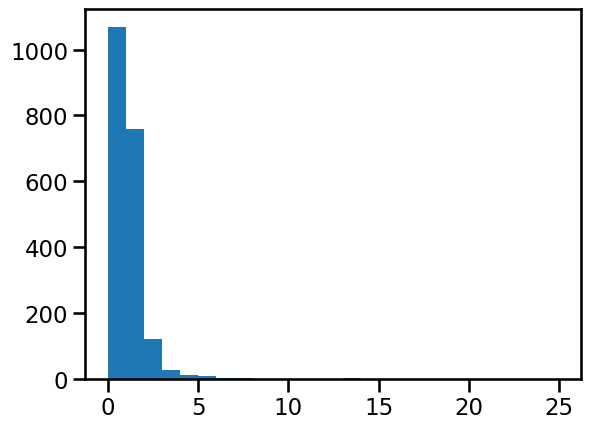

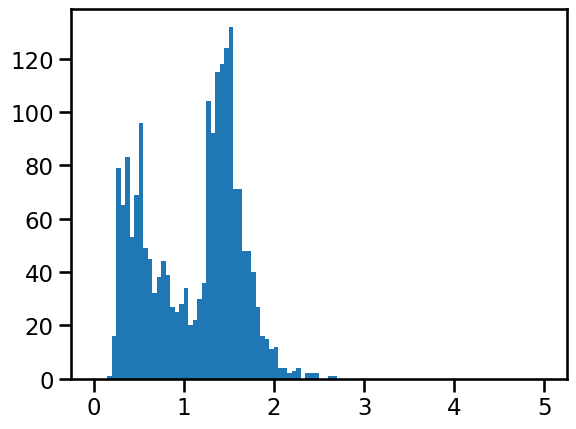

In [ ]:
import matplotlib.pyplot as plt

plt.hist(i["x"][0], bins=25, range=(0,25))
plt.show()
plt.hist(i["x"].mean(0), bins=100, range=(0,5))
plt.show()


In [20]:
x  = downsample_profile(i["x"], 0.4)

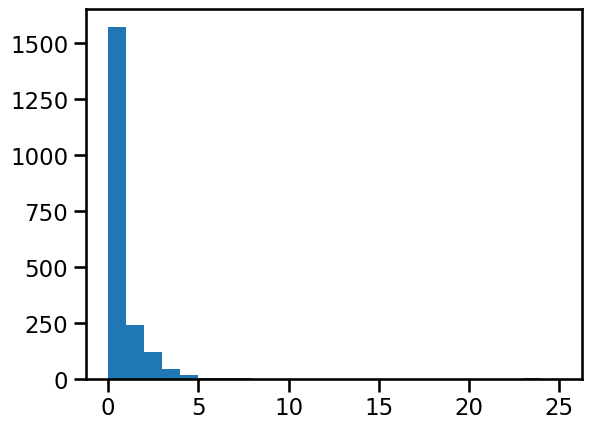

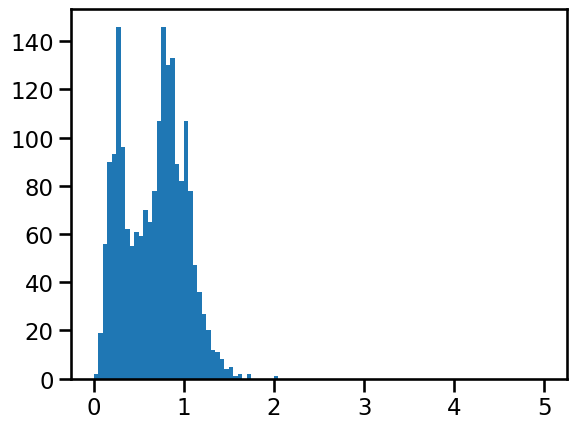

In [95]:
import matplotlib.pyplot as plt

plt.hist(x[0], bins=25, range=(0,25))
plt.show()
plt.hist(x.to(float).mean(0), bins=100, range=(0,5))
plt.show()


## Test a bunch of Cells and see if similar attention